In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import random 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
from mpl_toolkits.mplot3d import Axes3D
from blackjack2 import *

In [2]:
def mcExpStarts(num_episodes):
    #create BlackJack object
    bj = BlackJack()
    
    st_act_vals, st_act_cnt = np.zeros((10, 10, 2, 2)), np.ones((10, 10, 2, 2))   
    #optimal_policy = np.zeros((10, 10, 2))
    
    for episode in trange(num_episodes):
        #for each episode, randomly initialized state and action
        init_action = int(np.random.choice(bj.getActions()))
        random_usable_ace = bool(np.random.choice([0, 1]))
        random_player_state = np.random.choice(range(12, 22))
        random_dealer_card = np.random.choice(range(1, 11))
        init_state = [random_usable_ace,random_player_state,random_dealer_card]
        
        _, reward, player_seq_plays = bj.playGame(episode, init_state, init_action)
        
        for (usable_ace, player_state, dealer_card), action in player_seq_plays:
            usable_ace = int(usable_ace)
            player_state -= 12
            dealer_card -= 1
            action = int(action)
            # update values of state-action pairs
            #print([player_state, dealer_card, usable_ace, action])
            st_act_vals[player_state, dealer_card, usable_ace, action] += reward
            st_act_cnt[player_state, dealer_card, usable_ace, action] += 1
            bj.updatePolicy(usable_ace,player_state,dealer_card,st_act_vals,st_act_cnt)
            

    #st_act_cnt += 1
    st_act_vals = st_act_vals / st_act_cnt
    optimal_policy = bj.getOptimalPolicy()
    return st_act_vals, optimal_policy

In [3]:
def plot3dValues(usable_ace_states, no_usable_ace_states,titles):
    states = [usable_ace_states, no_usable_ace_states]
    x = np.arange(1,11)
    y = np.arange(12,22)
    x,y = np.meshgrid(x,y)
    fig = plt.figure(figsize = (20,10))
    ax1 = fig.add_subplot(111,projection='3d')
    #_, ax = plt.subplot(121,projection='3d')
    
    surf1 = ax1.plot_surface(x,y,states[0],rstride=1,cstride=1,cmap = mpl.cm.coolwarm,linewidth=0,antialiased=False)
    ax1.set_xlabel('Dealer showing')
    ax1.set_ylabel('Player State')
    ax1.set_title(titles[0])
    plt.show()
    fig2 = plt.figure(figsize = (30,10))
    ax2 = fig2.add_subplot(121,projection='3d')
    surf2 = ax2.plot_surface(x,y,states[1],rstride=1,cstride=1,cmap = mpl.cm.coolwarm,linewidth=0,antialiased=False)
    ax2.set_xlabel('Dealer showing')
    ax2.set_ylabel('Player State')
    ax2.set_title(titles[1])
    
    #fig.colorbar(surf1,shrink = 0.5, aspect = 5)
    plt.show()

In [4]:
def plotPolicy(no_usable_ace_policy,usable_ace_policy):
    _, axes = plt.subplots(1, 1, figsize=(15, 10))
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    # axes = axes.flatten()


    fig = sns.heatmap(np.flipud(usable_ace_policy), cmap="YlGnBu", ax=axes, xticklabels=range(1, 11),
                      yticklabels=list(reversed(range(12, 22))))
    fig.set_ylabel('player sum', fontsize=30)
    fig.set_xlabel('dealer showing', fontsize=30)
    fig.set_title('pi* with usable ace', fontsize=30)
    plt.show()
    
    _, axes = plt.subplots(1, 1, figsize=(15, 10))
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    # axes = axes.flatten()


    fig = sns.heatmap(np.flipud(no_usable_ace_policy), cmap="YlGnBu", ax=axes, xticklabels=range(1, 11),
                      yticklabels=list(reversed(range(12, 22))))
    fig.set_ylabel('player sum', fontsize=30)
    fig.set_xlabel('dealer showing', fontsize=30)
    fig.set_title('pi* with no usable ace', fontsize=30)
    plt.show()

In [5]:
def figure5_2():
    st_act_vals, optimal_policy = mcExpStarts(500000)

    #extract the state values from the state-action values 
    no_usable_ace_st_vals = np.max(st_act_vals[:,:,0,:], axis=-1)
    usable_ace_st_vals = np.max(st_act_vals[:,:,1,:], axis=-1)

    titles = ['V* with usable Ace','V* without usable Ace'] 
    plot3dValues(usable_ace_st_vals, no_usable_ace_st_vals,titles)

    #extract the optimal policy
    usable_ace_policy = optimal_policy[:,:,1]
    no_usable_ace_policy = optimal_policy[:,:,0]
    plotPolicy(no_usable_ace_policy,usable_ace_policy)
    

100%|██████████| 500000/500000 [00:33<00:00, 14731.73it/s]


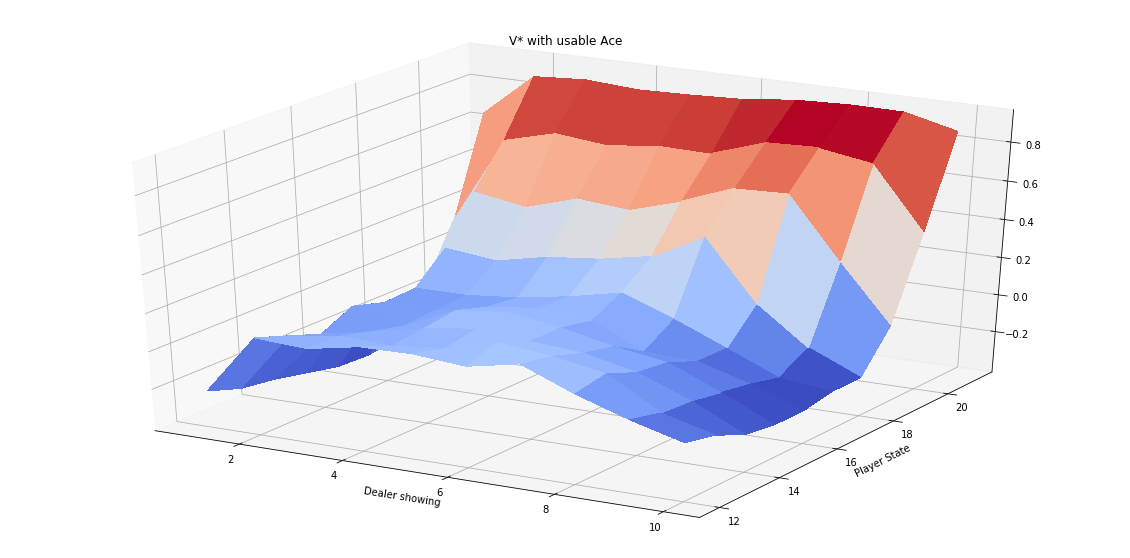

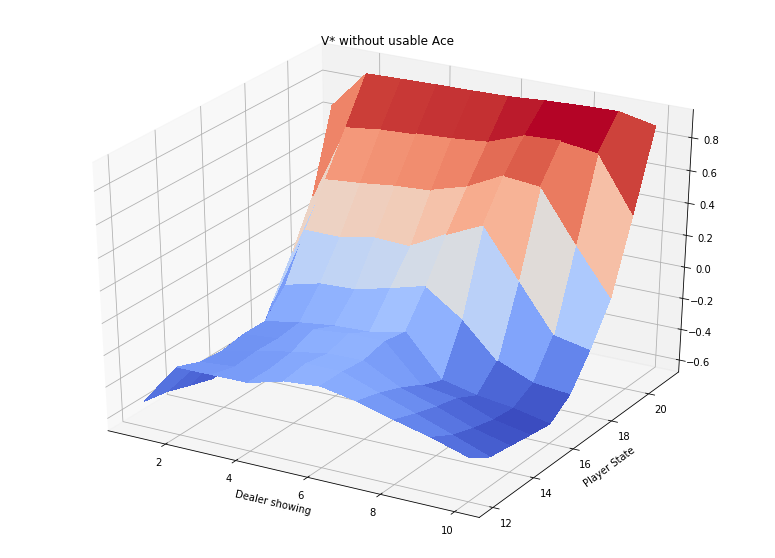

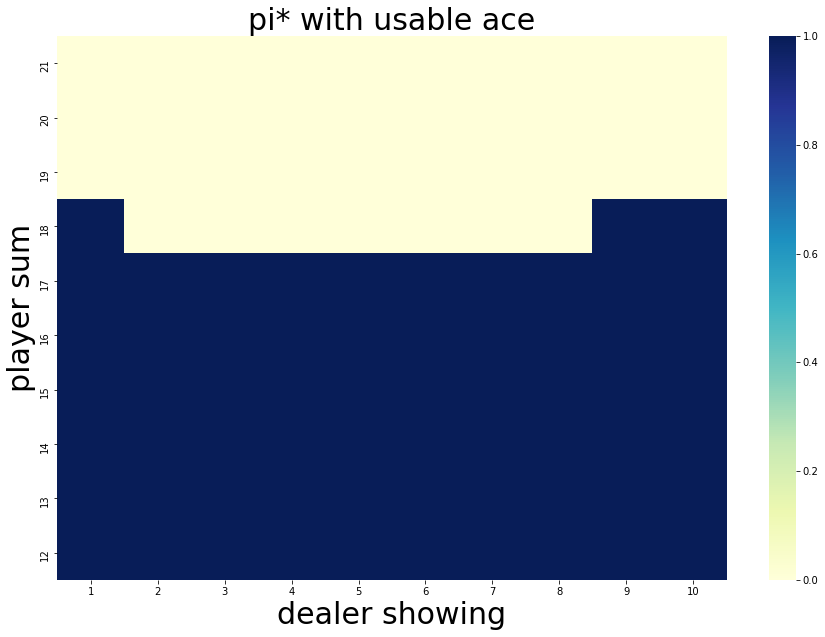

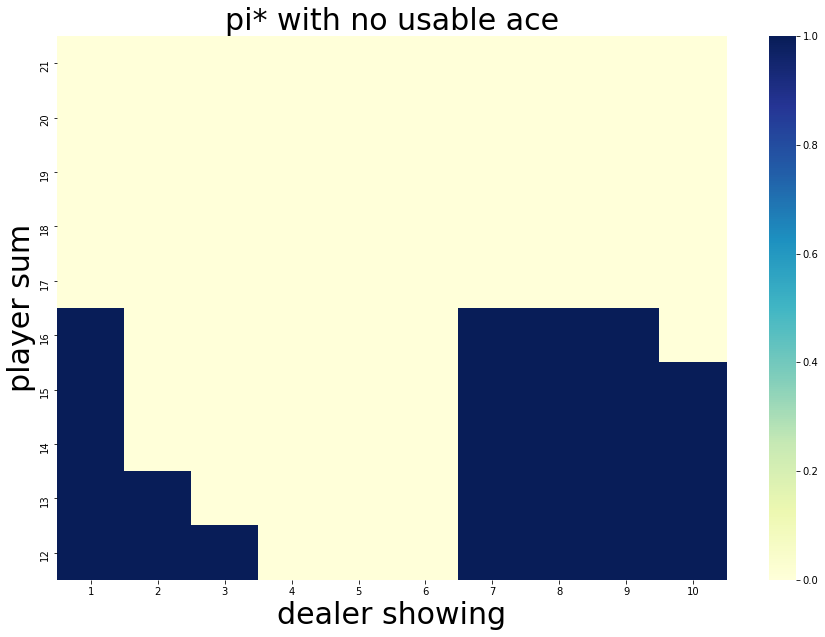

In [6]:
figure5_2()

In [17]:
#print(mpl.__version__)

In [16]:
#optimal_policy[:,:,0]